In [1]:
!pip install nltk pandas scikit-learn wordcloud matplotlib --quiet
import nltk
nltk.download("punkt"); nltk.download("stopwords"); nltk.download("wordnet")


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [2]:
# --- Cell 2: Load Dataset
from google.colab import files
import pandas as pd
uploaded = files.upload()
df = pd.read_csv("dataset.csv")
print("Shape:", df.shape)
df.head()


Saving dataset.csv to dataset (1).csv
Shape: (370, 4)


,Unnamed: 0,source_text,plagiarized_text,label
0,0,Researchers have discovered a new species of b...,Scientists have found a previously unknown but...,1
1,1,The moon orbits the Earth in approximately 27....,Our natural satellite takes around 27.3 days t...,1
2,2,Water is composed of two hydrogen atoms and on...,H2O consists of 2 hydrogen atoms and 1 oxygen ...,1
3,3,The history of Rome dates back to 753 BC.,Rome has a long history that can be traced bac...,1
4,4,Pluto was once considered the ninth planet in ...,"In the past, Pluto was classified as the ninth...",1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 370 entries, 0 to 369
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        370 non-null    int64 
 1   source_text       370 non-null    object
 2   plagiarized_text  370 non-null    object
 3   label             370 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 11.7+ KB
None
Unnamed: 0          0
source_text         0
plagiarized_text    0
label               0
dtype: int64


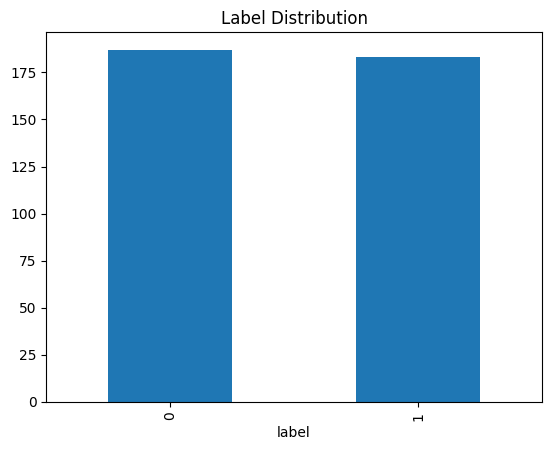

In [3]:
# --- Cell 3: EDA
import matplotlib.pyplot as plt
print(df.info())
print(df.isna().sum())
df['label'].value_counts().plot(kind='bar', title="Label Distribution")
plt.show()


In [4]:
# --- Cell 4: Text Lengths
df['len_source'] = df['source_text'].str.split().apply(len)
df['len_plag'] = df['plagiarized_text'].str.split().apply(len)
df[['len_source','len_plag']].describe()


,len_source,len_plag
count,370.000000,370.000000
mean,7.037838,7.724324
std,2.394365,2.152632
min,3.000000,3.000000
25%,5.000000,6.000000
50%,7.000000,7.000000
75%,9.000000,9.000000
max,14.000000,15.000000
